# <center>Trabajo Semanal 2</center>
### <center> Autor: Arturo Huber </center>

## Introducción teórica
En este trabajo abordaremos el tema de los Sistemas Lineales e Invariantes en el Tiempo - Sistemas LTI, su caracterización y su simulación mediante Python. Para ello, vamos a utilizar los siguientes fundamentos teóricos.

**Sistemas LTI**

Un sistema lineal e invariante en el tiempo (LTI) es aquel que cumple dos propiedades fundamentales:<br>
*Linealidad*:  La salida ante una combinación lineal de entradas es igual a la misma combinación lineal de las salidas individuales.

$$
x[n] = a·x1[n] + b·x2[n]  ->  y[n] = a·y1[n] + b·y2[n]
$$

*Invarianza en el tiempo*: Si la entrada se desplaza en el tiempo, la salida se desplaza en la misma cantidad sin cambiar su forma.

$$
x[n−n_0]⇒y[n−n_0]
$$


**Ecuaciones en diferencias**

En el caso discreto, los sistemas LTI  se pueden describir mediante ecuaciones en diferencias lineales con coeficientes constantes.

De forma general:

$$
\sum_{k=0}^{N} a_k \, y[n-k] \;=\; \sum_{m=0}^{M} b_m \, x[n-m]
$$

Donde:
* Los términos de la derecha (dependientes de la entrada) representan la parte forzada del sistema.
* Los términos de la izquierda (dependientes de salidas pasadas) representan la parte natural o transitoria.

Existen dos clases principales de sistemas:
FIR (Finite Impulse Response): no dependen de salidas pasadas, solo de entradas presentes y pasadas.
IIR (Infinite Impulse Response): incluyen salidas pasadas (realimentación), por lo que la respuesta nunca se anula.

**Respuesta al impulso**

La respuesta al impulso $h[n]$ se obtiene aplicando como entrada un impulso unitario:
$$
x[n]=δ[n]⇒y[n]=h[n]
$$

Las propiedades de *linealidad* e *Invarianza en el tiempo*, nos permiten caracterizar los sistemas LTI mediante su respuesta al impulso. Es decir, conociendo $h[n]$, se puede obtener la salida para cualquier señal de entrada mediante la operación de convolución con la respuesta al impulso. Por lo que:

$$
y[n] = x[n] * h[n]
$$

Siendo:
* $y[n]$: La salida del sistema
* $x[n]$: La señal de entrada al sistema
* $h[n]$: La respuesta al impulso

## Análisis y Desarrollo

**Punto 1**

Para la realización del primer punto, se importan las señales del primer trabajo semanal. Las señales son:
* La señal *Original* : Señal senoidal de amplitud: 1, frecuencia: 2KHz, fase: 0
* La señal *Amplificada y desafazada*: Señal senoidal de amplitud: 2, frecuencia: 2KHz, fase: $\pi/2$
* La señal *Modulada* : La señal *Original* modulada con otra senoidal de la mitad de la frecuencia
* La señal *Modulada y Recortada* : La señal anterior recortada al 75% de su amplitud maxima
* La señal *Cuadrada*: Señal cuadrada de amplitud 1 y frecuencia de 4KHz
* La señal *Pulso*: Un pulso de 10ms de amplitud uno

Para calcular la salida de las señales del siguiente sistema LTI:

$$
y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]
$$

Se programa la siguiente función:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from TS1 import Original, y2, s_am, s_clip, sq, pulso, fs

def sistema_lti(x, nombre):
    """
    Resuelve
    y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]

    Parámetros
    ----------
    x :  Vector
        Señal de entrada x[n] 
    
    Returns
    -------
    y : Vector
        Señal de salida y[n]
    """
    Ts = 1/fs
    N = len(x)
    t = np.arange(N) * Ts
    y = np.zeros(N, dtype=float)

    for n in range(N):
        
        # Si los coeficientes son negativos, el resultado es 0        
        if n-1 >= 0:
            x1 = x[n-1]
            y1 = y[n-1]
        else:
            x1 = 0.0
            y1 = 0.0

        if n-2 >= 0:
            x2 = x[n-2]
            y2 = y[n-2]
        else:
            x2 = 0.0
            y2 = 0.0

        # Calculo
        y[n] = 0.03*x[n] + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
        
    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, y, label="Salida")
    plt.title(f"Respuesta a la señal {nombre}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()
    

    print(f"Potencia de la señal {nombre} = {np.mean(y**2):.3f}")

    return y

Y graficacmos las salidas

Para las simulaciones se toma un fs = 50000 y una duracion de 0.01 



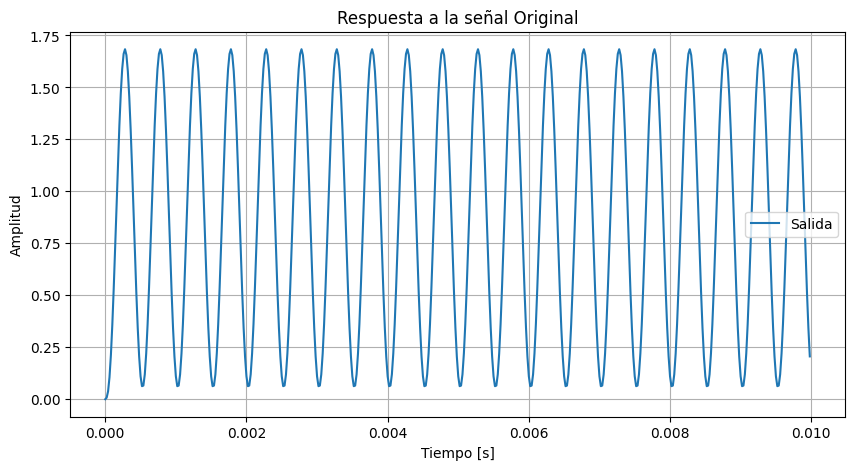

Potencia de la señal Original = 1.089


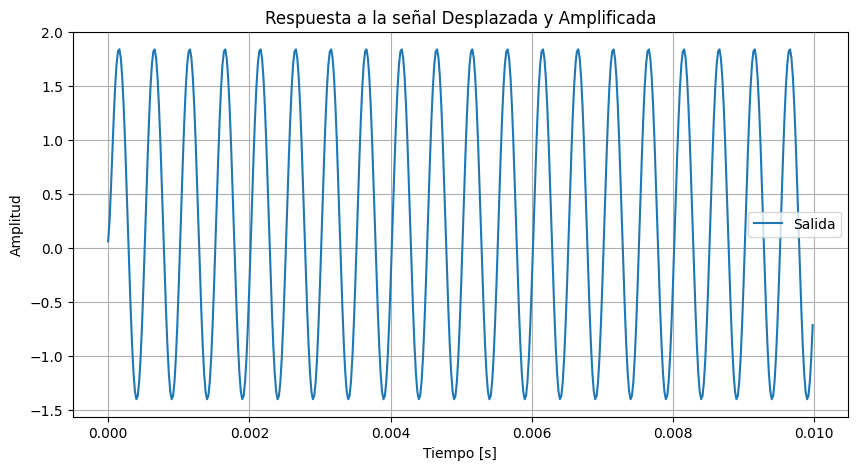

Potencia de la señal Desplazada y Amplificada = 1.371


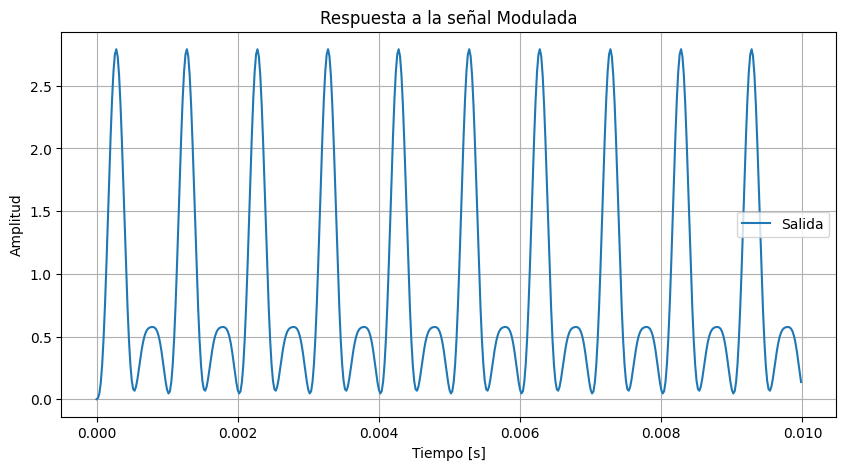

Potencia de la señal Modulada = 1.488


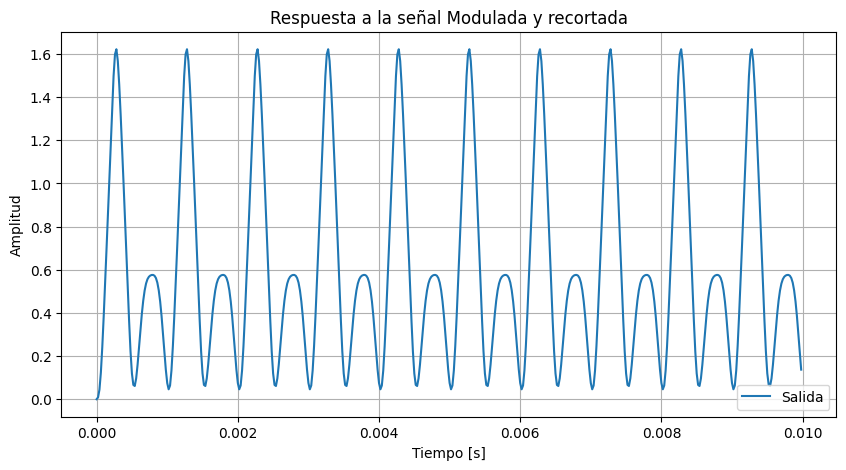

Potencia de la señal Modulada y recortada = 0.565


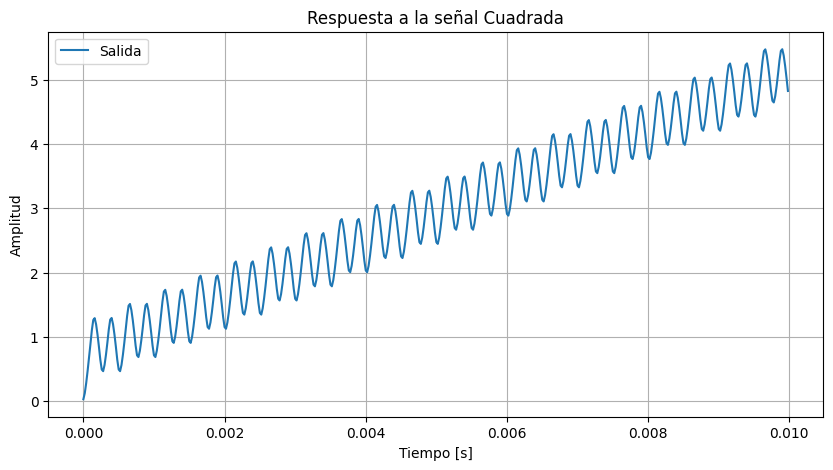

Potencia de la señal Cuadrada = 10.280


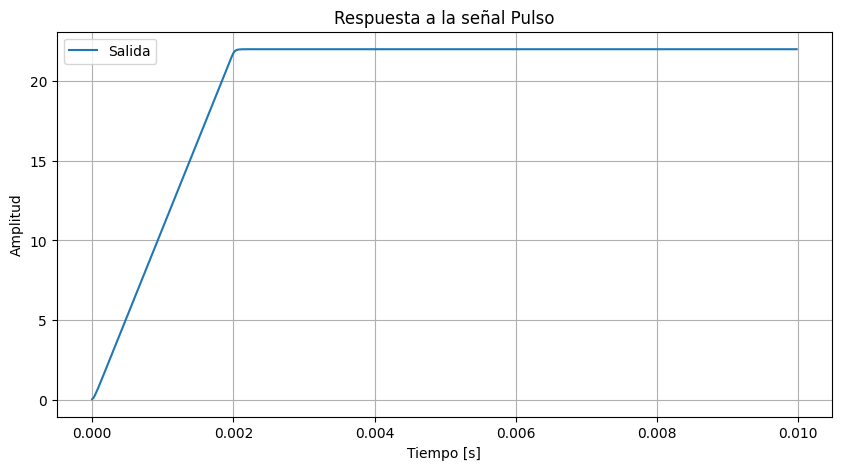

Potencia de la señal Pulso = 417.992


In [26]:
N = 500          
print(f"Para las simulaciones se toma un fs = {fs} y una duracion de {N/fs:.2f} \n")
y = sistema_lti(Original, "Original")                      # Senoidal f: 2KHz A:1 fase :0
y = sistema_lti(y2, "Desplazada y Amplificada")            # Senoidal f: 2KHz A:2 fase :p1/2
y = sistema_lti(s_am, "Modulada")                          # Señal original modulada
y = sistema_lti(s_clip, "Modulada y recortada")            # Señal anterior recortada
y = sistema_lti(sq, "Cuadrada")                            # Cuadrada f: 4KHz A:1
y = sistema_lti(pulso, "Pulso")                            # Pulso de 10ms


Luego, calculamos la respuesta al impulso del sistema y calculamos la salida mediante el calculo de la convolución de la señal de entrada y la respuesta al impulso y comparamos los resultados obtenidos.

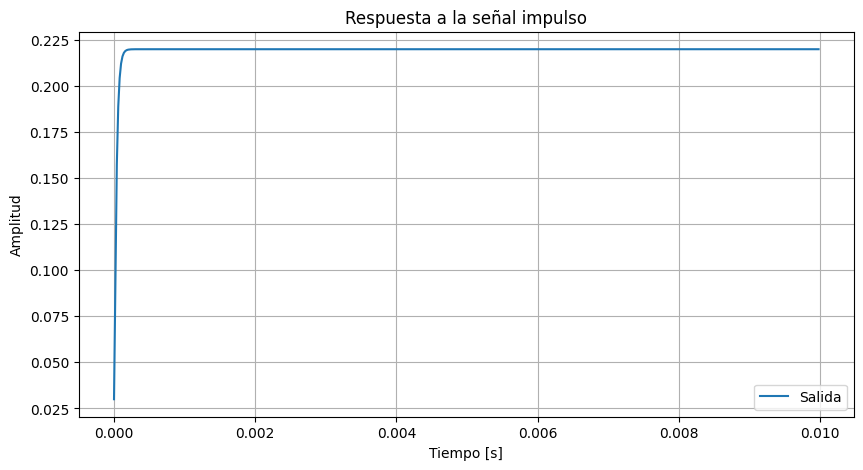

Potencia de la señal impulso = 0.048


In [27]:
# Generar la señal impulso y su respuesta

impulso = np.zeros(N)
impulso[0] = 1 

h = sistema_lti(impulso, "impulso")                    # h: respuesta al impulso

In [ ]:
Creamos la siguiente función para graficar la salida mediante el cálculo de la convolución

In [37]:
def convolucion(x, h, nombre):
    """
    Calcula la respuesta a traves de la convolucion con h

    Parameters
    ----------
    x : Vector
        Señal de entrada
    h : Vector
        Respuesta al impulso

    Returns
    -------
    None.

    """
    y = np.convolve(x, h)
    
    Ts = 1/fs
    N = len(y)
    t = np.arange(N) * Ts
    
        
    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, y, label="Salida")
    plt.axvline(x=0.01, color = 'black', linestyle='--', label='s = 0.01')
    plt.title(f"Salida de la señal {nombre} mediante convolución")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()



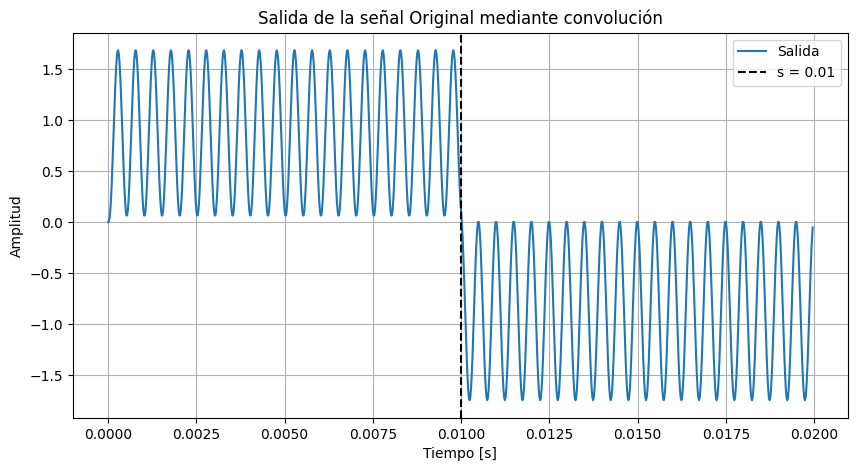

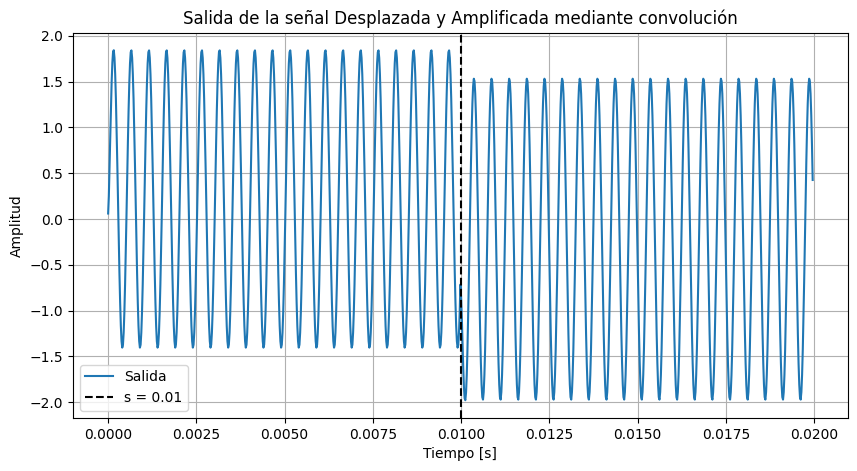

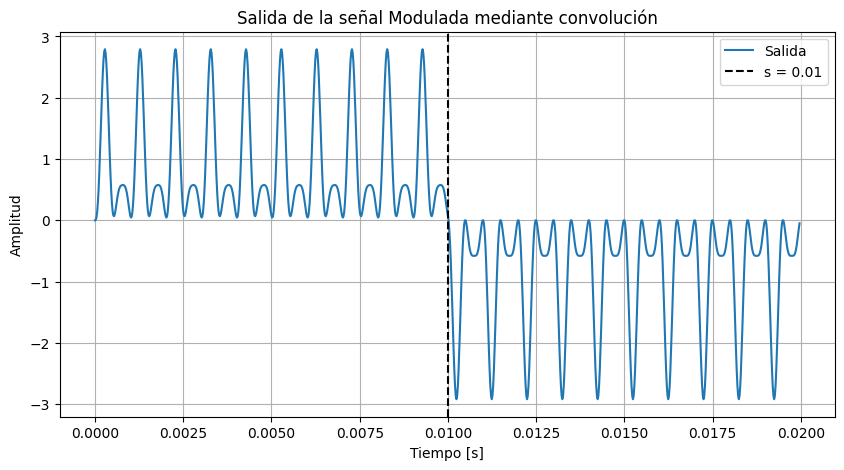

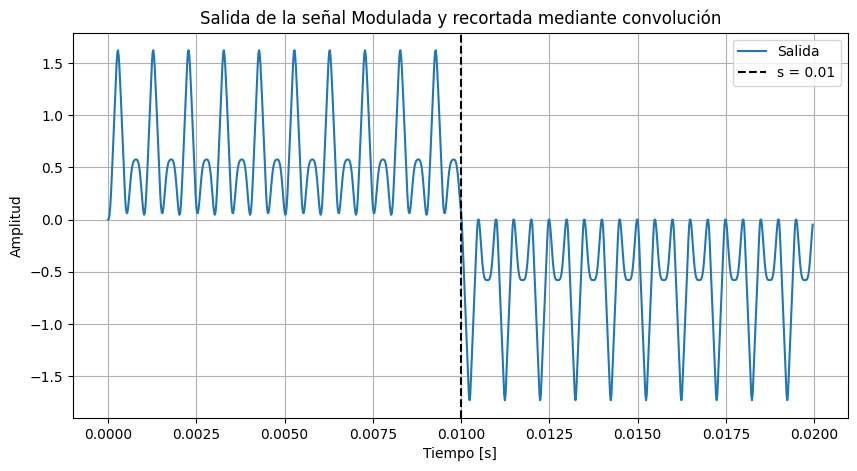

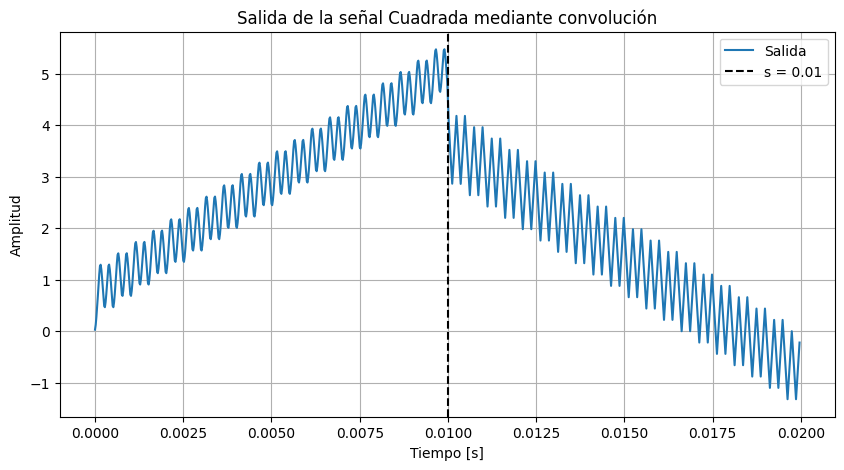

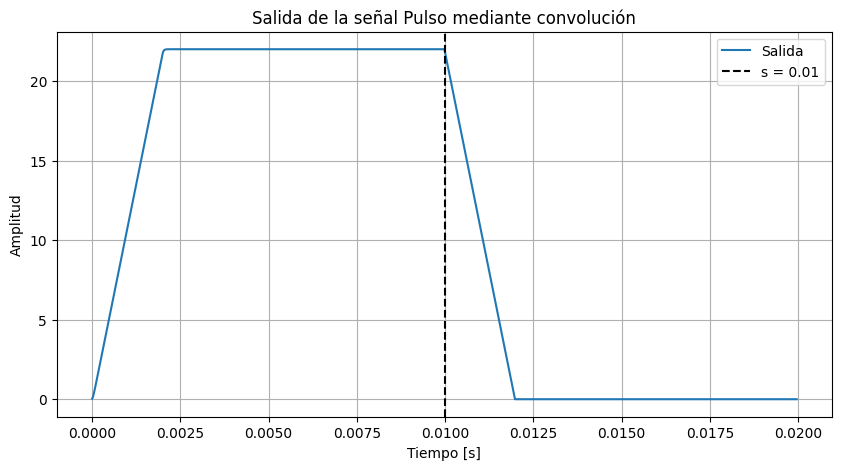

In [38]:
convolucion(Original, h, "Original")                   # Senoidal f: 2KHz A:1 fase :0
convolucion(y2, h, "Desplazada y Amplificada")         # Senoidal f: 2KHz A:2 fase :p1/2
convolucion(s_am, h, "Modulada")                       # Señal original modulada
convolucion(s_clip, h, "Modulada y recortada")         # Señal anterior recortada
convolucion(sq, h, "Cuadrada")                         # Cuadrada f: 4KHz A:1
convolucion(pulso, h, "Pulso")                         # Pulso de 10ms

Comparando con la respuesta obtenida numericamente las salidas coinciden en 

## Conclusiones

## Autoevaluación de aprendizaje